In [352]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
df=pd.read_csv('TenthCircuit.csv')
df.head()


,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category
0,Hansen v. SkyWest Airlines,12/21/16,1,Briscoe,McKay,Matheson,1,1,1,Title VII
1,Hansen v. SkyWest Airlines,12/21/16,2,Briscoe,McKay,Matheson,0,0,0,Title VII
2,Glapion v. Jewell,12/14/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
3,Dye v. Moniz,12/06/16,1,Lucero,Holmes,Moritz,0,0,0,Title VII
4,"Lister v. City of Wichita, Kansas",11/15/16,1,Lucero,Matheson,Bacharach,0,0,0,Title VII


In [353]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 954 entries, 0 to 953
Data columns (total 10 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Title     954 non-null    object
 1   Date      954 non-null    object
 2   Issue     954 non-null    int64 
 3   Judge1    954 non-null    object
 4   Judge2    954 non-null    object
 5   Judge3    954 non-null    object
 6   Vote1     954 non-null    int64 
 7   Vote2     954 non-null    int64 
 8   Vote3     954 non-null    int64 
 9   Category  954 non-null    object
dtypes: int64(4), object(6)
memory usage: 74.7+ KB


Data description
– Title — name of the case being considered in court
– Date — date of the decision
– Issue — session number
– Judge1, Judge2, Judge3 — names of judges
– Vote1, Vote2, Vote3 — judge's voice (liberal = 1, conservative = 0)
– Category — category of the case

In [354]:
df_year=df.groupby(pd.to_datetime(df['Date'], dayfirst=False).dt.year)['Title'].count()
df_year.head()

Date
2006    104
2007     98
2008     96
2009     78
2010     80
Name: Title, dtype: int64

In [355]:
df['Date']=pd.to_datetime(df['Date'], dayfirst=True)

In [356]:
df['month']=df['Date'].dt.month
df.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,month
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII,12
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII,12
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,12
3,Dye v. Moniz,2016-06-12,1,Lucero,Holmes,Moritz,0,0,0,Title VII,6
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,11


In [357]:
def get_season(month):
    if 3 <= month <= 5:
        return 'spring'
    elif 6 <= month <= 8:
        return 'summer'
    elif 9<= month <= 11:
        return 'autumn'
    else:
        return 'winter'


In [358]:
df['season'] = df['month'].apply(get_season)
df.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,month,season
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII,12,winter
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII,12,winter
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,12,winter
3,Dye v. Moniz,2016-06-12,1,Lucero,Holmes,Moritz,0,0,0,Title VII,6,summer
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,11,autumn


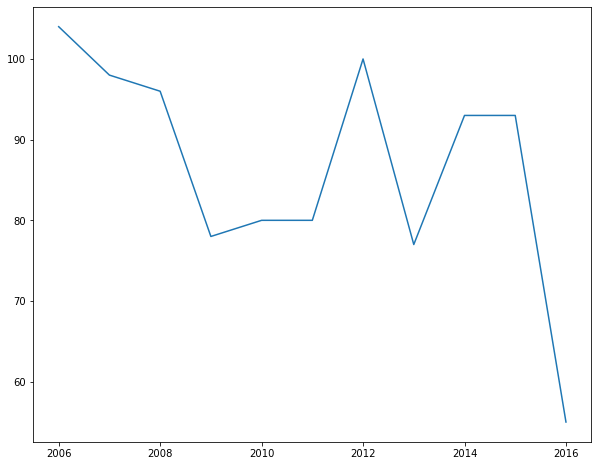

In [359]:
fig, ax = plt.subplots(figsize=(10,8))
ax.plot(df_year)


In [360]:
df_category=df.groupby('Category')['Title'].count()
df_category.head()

Category
Immigration    554
Title VII      400
Name: Title, dtype: int64

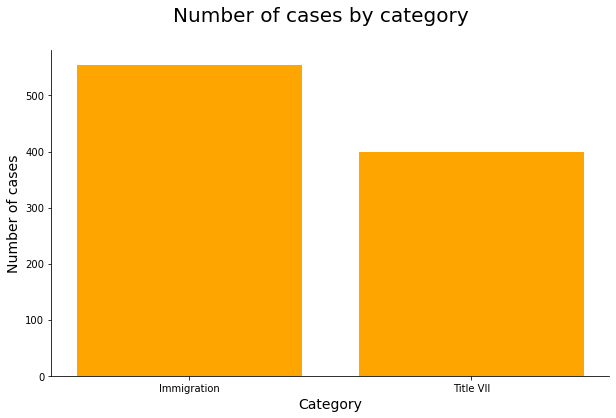

In [361]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_category.index, df_category,   color='orange')
fig.suptitle('Number of cases by category', fontsize=20)
ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Number of cases', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)


In [362]:
df_the_same_vote_conservative=df[(df['Vote1']==0) &(df['Vote2']==0) & (df['Vote3']==0)]
df_the_same_vote_conservative.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,month,season
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII,12,winter
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,12,winter
3,Dye v. Moniz,2016-06-12,1,Lucero,Holmes,Moritz,0,0,0,Title VII,6,summer
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,11,autumn
5,ElHelbawy v. Pritzker,2016-10-13,1,Tymkovich,Bacharach,Moritz,0,0,0,Title VII,10,autumn


In [363]:
df_the_same_vote_conservative_group=df_the_same_vote_conservative.groupby('Category')['Title'].count()
df_the_same_vote_conservative_group.head()

Category
Immigration    500
Title VII      328
Name: Title, dtype: int64

In [364]:
df_the_same_vote_liberal=df[(df['Vote1']==1) &(df['Vote2']==1) & (df['Vote3']==1)]
df_the_same_vote_liberal.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,month,season
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII,12,winter
14,Walton v. Powell,2016-04-19,1,Gorsuch,Murphy,Moritz,1,1,1,Title VII,4,spring
19,Unal v. Los Alamos Public Schools,2016-01-29,1,Briscoe,Lucero,McHugh,1,1,1,Title VII,1,winter
27,"Lounds v. Lincare, Inc.",2015-12-22,1,Kelly,Holmes,McHugh,1,1,1,Title VII,12,winter
35,Zisumbo v. Ogden Regional Medical Center,2015-04-09,1,Kelly,Phillips,Moritz,1,1,1,Title VII,4,spring


In [365]:
df_the_same_vote_liberal_group=df_the_same_vote_liberal.groupby('Category')['Title'].count()
df_the_same_vote_liberal_group.head()

Category
Immigration    47
Title VII      59
Name: Title, dtype: int64

Text(0.5, 0.98, 'Liberal Judge by category')

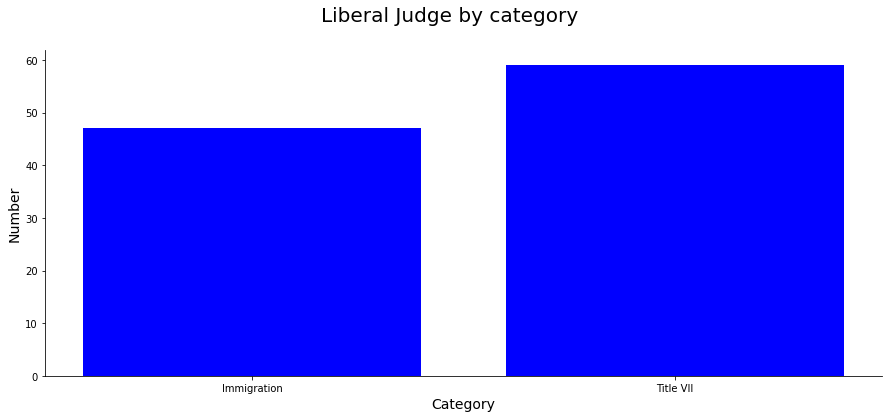

In [366]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(df_the_same_vote_liberal_group.index, 
       df_the_same_vote_liberal_group,   color='blue')

ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Number', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Liberal Judge by category', fontsize=20)

Text(0.5, 0.98, 'Conservative Judge by category')

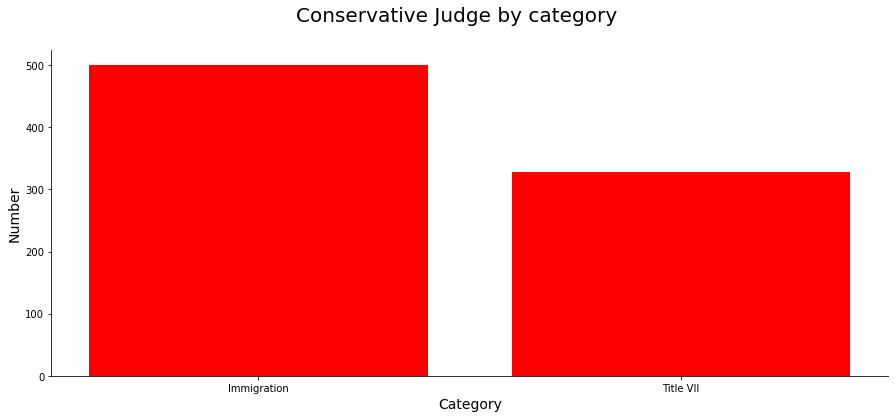

In [367]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(df_the_same_vote_conservative_group.index, 
       df_the_same_vote_conservative_group,   color='red')

ax.set_xlabel('Category', fontsize=14)
ax.set_ylabel('Number', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Conservative Judge by category', fontsize=20)


In [368]:
df_2016=df[df['Date'].dt.year==2016]

In [369]:
df_2016.groupby('month')['Title'].count().head()

month
1    13
2     3
3     3
4     7
5     1
Name: Title, dtype: int64

Text(0.5, 0.98, 'Number of cases by month')

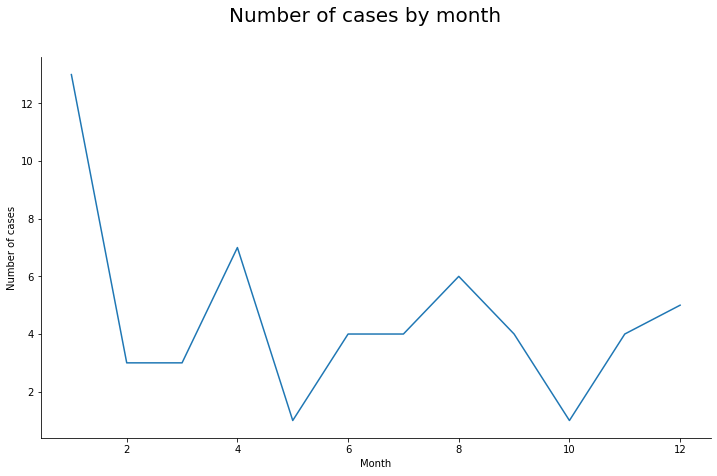

In [370]:

fig, ax = plt.subplots(figsize=(12,7))
ax.plot(df_2016.groupby('month')['Title'].count())
ax.set_xlabel('Month')
ax.set_ylabel('Number of cases')
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Number of cases by month', fontsize=20)

In [371]:
df['year']=df['Date'].dt.year

In [372]:
df.groupby('season')['Title'].count().head()

season
autumn    206
spring    252
summer    234
winter    262
Name: Title, dtype: int64

Text(0.5, 0.98, 'Number of cases by season')

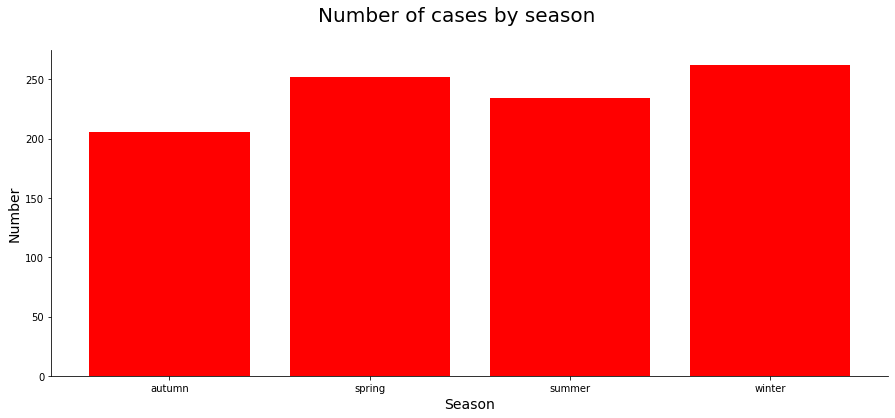

In [373]:
fig, ax = plt.subplots(figsize=(15,6))
ax.bar(df.groupby('season')['Title'].count().index, 
       df.groupby('season')['Title'].count(),   color='red')

ax.set_xlabel('Season', fontsize=14)
ax.set_ylabel('Number', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
fig.suptitle('Number of cases by season', fontsize=20)

In [374]:
df_judge_1=df[df['Category']=='Immigration'].groupby('Judge1')['Title'].count()
df_judge_1

Judge1
Bacharach     5
Briscoe      72
Brorby        2
Gorsuch      18
Hartz        76
Henry        31
Holmes       27
Kelly        84
Lucero       75
Matheson     19
McConnell    10
McHugh        2
McKay         2
Moritz        2
Murphy       14
O'Brien      28
Phillips      2
Porfilio      4
Tacha        35
Tymkovich    46
Name: Title, dtype: int64

In [375]:
df_judge_2=df[df['Category']=='Immigration'].groupby('Judge2')['Title'].count()
df_judge_2

Judge2
Anderson      63
Bacharach     11
Baldock       55
Barrett        1
Briscoe        5
Brorby        43
Ebel          40
Gorsuch       10
Hartz         11
Holloway      26
Holmes         7
Kelly          4
Lucero        13
Matheson       7
McConnell      5
McHugh         2
McKay         76
Mcwilliams     2
Murphy        15
O'Brien       22
Phillips       2
Porfilio      89
Seymour       12
Siler          1
Tacha          5
Tymkovich     27
Name: Title, dtype: int64

In [376]:
df_judge_3=df[df['Category']=='Immigration'].groupby('Judge3')['Title'].count()
df_judge_3

Judge3
Anderson     32
Arguello      2
Armijo        1
Bacharach    20
Baldock      41
Briscoe       7
Brorby       33
Brown         4
Eagan         2
Ebel         28
Figa          2
Frizzell      1
Gorsuch      23
Hartz        18
Holmes       62
Johnson       1
Kane          2
Kelly         2
Lucero       14
Matheson     35
McConnell    22
McHugh       20
McKay         2
Moritz       21
Murphy       32
O'Brien      41
Phillips     26
Porfilio      7
Seymour       2
Tacha         2
Tymkovich    49
Name: Title, dtype: int64

In [377]:
df_judge_concat_1=pd.concat([df_judge_1, df_judge_2], axis=1)  
df_judge_concat_1.head()

,Title,Title
Bacharach,5.0,11.0
Briscoe,72.0,5.0
Brorby,2.0,43.0
Gorsuch,18.0,10.0
Hartz,76.0,11.0


In [378]:
df_judge_concat_2=pd.concat([df_judge_concat_1, df_judge_3], axis=1)


In [379]:
df_judge_concat_2.columns=['Title_1', 'Title_2', 'Title_3']

In [380]:
df_judge_concat_2.head()

,Title_1,Title_2,Title_3
Bacharach,5.0,11.0,20.0
Briscoe,72.0,5.0,7.0
Brorby,2.0,43.0,33.0
Gorsuch,18.0,10.0,23.0
Hartz,76.0,11.0,18.0


In [381]:
df_judge_concat_2=df_judge_concat_2.fillna(0)

In [382]:
df_judge_concat_2['total']=df_judge_concat_2['Title_1']+df_judge_concat_2['Title_2']+df_judge_concat_2['Title_3']
df_judge_concat_2.head()

,Title_1,Title_2,Title_3,total
Bacharach,5.0,11.0,20.0,36.0
Briscoe,72.0,5.0,7.0,84.0
Brorby,2.0,43.0,33.0,78.0
Gorsuch,18.0,10.0,23.0,51.0
Hartz,76.0,11.0,18.0,105.0


In [383]:
df_judge_concat_2.sort_values('total', ascending=False)

,Title_1,Title_2,Title_3,total
Tymkovich,46.0,27.0,49.0,122.0
Hartz,76.0,11.0,18.0,105.0
Lucero,75.0,13.0,14.0,102.0
Porfilio,4.0,89.0,7.0,100.0
Holmes,27.0,7.0,62.0,96.0
Baldock,0.0,55.0,41.0,96.0
Anderson,0.0,63.0,32.0,95.0
O'Brien,28.0,22.0,41.0,91.0
Kelly,84.0,4.0,2.0,90.0
Briscoe,72.0,5.0,7.0,84.0


In [384]:
df_judge_concat_2.index.unique()

Index(['Bacharach', 'Briscoe', 'Brorby', 'Gorsuch', 'Hartz', 'Henry', 'Holmes',
       'Kelly', 'Lucero', 'Matheson', 'McConnell', 'McHugh', 'McKay', 'Moritz',
       'Murphy', 'O'Brien', 'Phillips', 'Porfilio', 'Tacha', 'Tymkovich',
       'Anderson', 'Baldock', 'Barrett', 'Ebel', 'Holloway', 'Mcwilliams',
       'Seymour', 'Siler', 'Arguello', 'Armijo', 'Brown', 'Eagan', 'Figa',
       'Frizzell', 'Johnson', 'Kane'],
      dtype='object')

In [385]:
df['Title'].value_counts().head(10)

Tabor v. Hilti, Inc.                           3
Semsroth v. City of Wichita                    3
Garcia v. Holder                               3
Singh v. Holder                                3
Flitton v. Primary Residential Mortg., Inc.    3
Hansen v. SkyWest Airlines                     2
Panjaitan v. Gonzales                          2
Maldonado v. City of Altus                     2
Sosa-Valenzuela v. Holder                      2
Jobira v. Holder                               2
Name: Title, dtype: int64

In [386]:
df_new=df.query('Title=="Tabor v. Hilti, Inc." |  Title=="Semsroth v. City of Wichita" |  \
Title=="Garcia v. Holder" |  Title=="Singh v. Holder" |  \
Title=="Flitton v. Primary Residential Mortg., Inc." ')
df_new.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,month,season,year
69,"Tabor v. Hilti, Inc.",2014-02-09,1,Hartz,Tymkovich,Holmes,0,0,0,Title VII,2,winter,2014
125,"Tabor v. Hilti, Inc.",2013-01-15,1,Lucero,O'Brien,Matheson,1,1,1,Title VII,1,winter,2013
126,"Tabor v. Hilti, Inc.",2013-01-15,2,Lucero,O'Brien,Matheson,0,0,0,Title VII,1,winter,2013
218,"Flitton v. Primary Residential Mortg., Inc.",2010-05-08,1,Tacha,McKay,Gorsuch,1,0,1,Title VII,5,spring,2010
219,"Flitton v. Primary Residential Mortg., Inc.",2010-05-08,2,Tacha,McKay,Gorsuch,0,0,1,Title VII,5,spring,2010


In [387]:
df_new_j1=df_new.groupby('Judge1')['Title'].count()

In [388]:
df_new_j2=df_new.groupby('Judge2')['Title'].count()

In [389]:
df_new_j3=df_new.groupby('Judge3')['Title'].count()

In [390]:
df_new_concat=pd.concat([df_new_j1, df_new_j2,], axis=1)

In [391]:
df_new_concat=pd.concat([df_new_concat, df_new_j3,], axis=1)


In [392]:
df_new_concat.head()

,Title,Title,Title
Hartz,1.0,NaN,2.0
Lucero,6.0,NaN,NaN
Matheson,1.0,NaN,2.0
Moritz,1.0,NaN,NaN
Murphy,2.0,2.0,1.0


In [393]:
df_new_concat.columns=['Title_1', 'Title_2', 'Title_3']

In [397]:
df_new_concat=df_new_concat.fillna(0)

In [398]:
df_new_concat['total']=df_new_concat['Title_1'] +df_new_concat['Title_2']+df_new_concat['Title_3']

In [399]:
df_new_concat.sort_values('total', ascending=False)

,Title_1,Title_2,Title_3,total
Lucero,6.0,0.0,0.0,6.0
Murphy,2.0,2.0,1.0,5.0
Baldock,0.0,1.0,3.0,4.0
Hartz,1.0,0.0,2.0,3.0
Matheson,1.0,0.0,2.0,3.0
Tacha,3.0,0.0,0.0,3.0
McKay,0.0,3.0,0.0,3.0
Porfilio,0.0,3.0,0.0,3.0
Gorsuch,0.0,0.0,3.0,3.0
Tymkovich,1.0,1.0,0.0,2.0


In [401]:
df_new2=df
df_new2.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,month,season,year
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII,12,winter,2016
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII,12,winter,2016
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,12,winter,2016
3,Dye v. Moniz,2016-06-12,1,Lucero,Holmes,Moritz,0,0,0,Title VII,6,summer,2016
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,11,autumn,2016


In [404]:
df_new2['total_vote']=df_new2['Vote1']+df_new2['Vote2']+df_new2['Vote3']
df_new2.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,month,season,year,total_vote
0,Hansen v. SkyWest Airlines,2016-12-21,1,Briscoe,McKay,Matheson,1,1,1,Title VII,12,winter,2016,3
1,Hansen v. SkyWest Airlines,2016-12-21,2,Briscoe,McKay,Matheson,0,0,0,Title VII,12,winter,2016,0
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,12,winter,2016,0
3,Dye v. Moniz,2016-06-12,1,Lucero,Holmes,Moritz,0,0,0,Title VII,6,summer,2016,0
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,11,autumn,2016,0


In [405]:
df_new2_conservative=df_new2[df_new2['total_vote']<=1]
df_new2_conservative.shape

(840, 14)

In [408]:
df_new2_liberal=df_new2[df_new2['total_vote']>=2]
df_new2_liberal.shape

(114, 14)

In [410]:
df_lucero=df.query('Judge1=="Lucero" | Judge2=="Lucero" | Judge3=="Lucero" ')
df_lucero.head()

,Title,Date,Issue,Judge1,Judge2,Judge3,Vote1,Vote2,Vote3,Category,month,season,year,total_vote
2,Glapion v. Jewell,2016-12-14,1,Lucero,Holmes,Moritz,0,0,0,Title VII,12,winter,2016,0
3,Dye v. Moniz,2016-06-12,1,Lucero,Holmes,Moritz,0,0,0,Title VII,6,summer,2016,0
4,"Lister v. City of Wichita, Kansas",2016-11-15,1,Lucero,Matheson,Bacharach,0,0,0,Title VII,11,autumn,2016,0
8,Drury v. BNSF Railway Company,2016-02-08,1,Tymkovich,Lucero,Bacharach,0,0,0,Title VII,2,winter,2016,0
15,"Aman v. Dillon Companies, Inc.",2016-04-15,1,Briscoe,Lucero,McHugh,0,0,0,Title VII,4,spring,2016,0


In [412]:
df_lucero_by_year=df_lucero.groupby('year')['Title'].count()

In [413]:
df_lucero_by_year

year
2006    20
2007    22
2008    20
2009     9
2010    12
2011    13
2012    17
2013    14
2014    21
2015    15
2016    14
Name: Title, dtype: int64

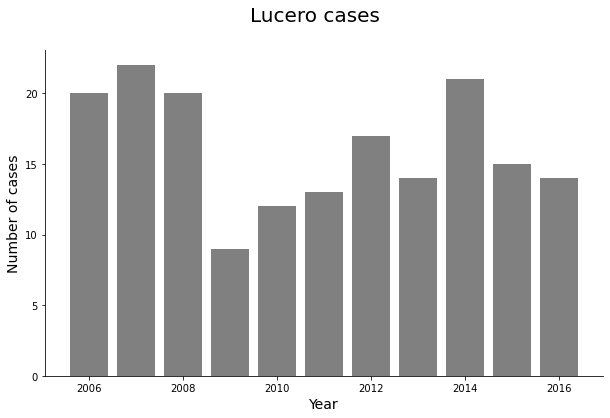

In [417]:
fig, ax = plt.subplots(figsize=(10,6))
ax.bar(df_lucero_by_year.index, df_lucero_by_year,   color='grey')
fig.suptitle('Lucero cases', fontsize=20)
ax.set_xlabel('Year', fontsize=14)
ax.set_ylabel('Number of cases', fontsize=14)
ax.spines['right'].set_visible(False)
ax.spines['top'].set_visible(False)
